<a href="https://colab.research.google.com/github/Shantanuraje18/Codeit-Internship-AIML/blob/main/BoW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import nltk
import kagglehub
import spacy
import os

# 1. Download Dataset
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
df = pd.read_csv(os.path.join(path, "spam.csv"), encoding='latin-1')[['v2']]
df.columns = ['text']
df = df.head(500) # Using 500 rows for faster execution

# 2. Setup Spacy (Alternative to Gensim for Word2Vec)
# Note: Run 'python -m spacy download en_core_web_md' in your terminal first
try:
    nlp = spacy.load("en_core_web_md")
except:
    import subprocess
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_md"])
    nlp = spacy.load("en_core_web_md")

# 3. NLTK Preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added to resolve the LookupError
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    tokens = word_tokenize(text.lower())
    return " ".join([w for w in tokens if w.isalpha() and w not in stop_words])

df['cleaned_text'] = df['text'].apply(clean_text)
print("Block 1 Complete: Data imported and cleaned.")

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Block 1 Complete: Data imported and cleaned.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 1. Bag of Words (BoW)
bow_vec = CountVectorizer(max_features=10)
bow_matrix = bow_vec.fit_transform(df['cleaned_text']).toarray()

# 2. TF-IDF
tfidf_vec = TfidfVectorizer(max_features=10)
tfidf_matrix = tfidf_vec.fit_transform(df['cleaned_text']).toarray()

print("Block 2 Complete: BoW and TF-IDF matrices generated.")

Block 2 Complete: BoW and TF-IDF matrices generated.


In [5]:
# 3. Word2Vec / Word Embeddings using Spacy
def get_vectors(text):
    # nlp() creates a Doc object containing dense 300-D vectors
    doc = nlp(text)
    return doc.vector

# Generate dense representations
df['dense_vectors'] = df['cleaned_text'].apply(get_vectors)

# Convert list of vectors into a 2D array for analysis
word_vectors_matrix = np.stack(df['dense_vectors'].values)

print(f"Block 3 Complete: Dense vectors generated with shape {word_vectors_matrix.shape}.")

Block 3 Complete: Dense vectors generated with shape (500, 300).


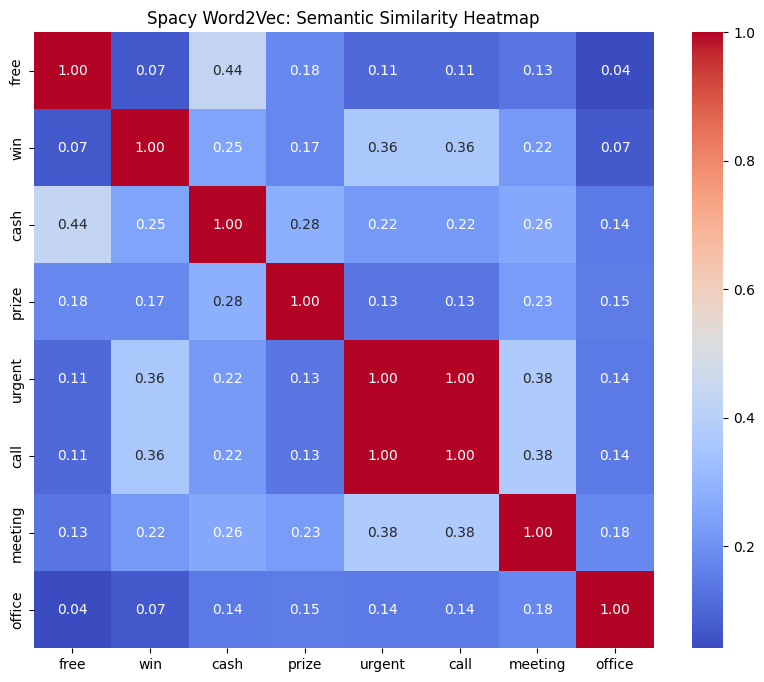

,Method,Dimensions,Sparsity
0,Bag of Words,10,High (Sparse)
1,TF-IDF,10,High (Sparse)
2,Spacy Word2Vec,300,Low (Dense)


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Semantic Heatmap
keywords = ["free", "win", "cash", "prize", "urgent", "call", "meeting", "office"]
tokens = [nlp(word) for word in keywords]
size = len(keywords)
sim_matrix = np.zeros((size, size))

for i in range(size):
    for j in range(size):
        # Spacy uses Cosine Similarity by default for .similarity()
        sim_matrix[i, j] = tokens[i].similarity(tokens[j])

plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, annot=True, xticklabels=keywords, yticklabels=keywords, cmap='coolwarm', fmt=".2f")
plt.title('Spacy Word2Vec: Semantic Similarity Heatmap')
plt.show()

# 2. Final Comparison Table
comparison_df = pd.DataFrame({
    "Method": ["Bag of Words", "TF-IDF", "Spacy Word2Vec"],
    "Dimensions": [bow_matrix.shape[1], tfidf_matrix.shape[1], word_vectors_matrix.shape[1]],
    "Sparsity": ["High (Sparse)", "High (Sparse)", "Low (Dense)"]
})
display(comparison_df)

In [7]:
import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# --- BLOCK 1: THE INPUT ---
# Using a single sample sentence to show clear outputs
sample_text = ["Free entry in 2 a weekly comp to win FA Cup final tkts 21st May 2005."]
print(f"Original Input:\n{sample_text[0]}\n")

# Pre-cleaned version (representing what the cleaner does)
cleaned_text = ["free entry weekly comp win fa cup final tkts may"]
print(f"Cleaned Query Output:\n{cleaned_text[0]}\n")

# --- BLOCK 2: BAG OF WORDS (BoW) OUTPUT ---
# BoW simply counts how many times each word appears.
bow_vec = CountVectorizer()
bow_matrix = bow_vec.fit_transform(cleaned_text).toarray()
bow_df = pd.DataFrame(bow_matrix, columns=bow_vec.get_feature_names_out())

print("1. Bag of Words (BoW) Output:")
print("Logic: Counts frequency. Notice 'free' and 'win' become 1s.")
display(bow_df)
print("-" * 30)

# --- BLOCK 3: TF-IDF OUTPUT ---
# TF-IDF weighs the words. In a single sentence, it looks like BoW,
# but in a big dataset, common words get lower scores.
tfidf_vec = TfidfVectorizer()
tfidf_matrix = tfidf_vec.fit_transform(cleaned_text).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf_vec.get_feature_names_out())

print("2. TF-IDF Output:")
print("Logic: Importance weights. Rarer words in a big dataset get higher values.")
display(tfidf_df.round(4))
print("-" * 30)

# --- BLOCK 4: WORD TO VECTOR (via SpaCy) OUTPUT ---
# This converts the sentence into a 300-dimensional dense vector.
nlp = spacy.load("en_core_web_md")
doc = nlp(cleaned_text[0])
w2v_vector = doc.vector # The average vector for the sentence

print("3. Word to Vector (SpaCy) Output:")
print(f"Logic: Semantic meaning as a dense vector. Total dimensions: {len(w2v_vector)}.")
print(f"First 10 dimensions: {w2v_vector[:10].round(4)}")
print("-" * 30)

# --- BLOCK 5: WORD EMBEDDINGS OUTPUT ---
# Word embeddings represent individual word relationships.
print("4. Word Embeddings Analysis:")
word1 = nlp("win")
word2 = nlp("prize")
word3 = nlp("office")

print(f"Vibe Check: 'win' vs 'prize' similarity: {word1.similarity(word2):.4f}")
print(f"Vibe Check: 'win' vs 'office' similarity: {word1.similarity(word3):.4f}")
print("Logic: 'win' and 'prize' have a higher score because they share a 'vibe'.")

Original Input:
Free entry in 2 a weekly comp to win FA Cup final tkts 21st May 2005.

Cleaned Query Output:
free entry weekly comp win fa cup final tkts may

1. Bag of Words (BoW) Output:
Logic: Counts frequency. Notice 'free' and 'win' become 1s.


,comp,cup,entry,fa,final,free,may,tkts,weekly,win
0,1,1,1,1,1,1,1,1,1,1


------------------------------
2. TF-IDF Output:
Logic: Importance weights. Rarer words in a big dataset get higher values.


,comp,cup,entry,fa,final,free,may,tkts,weekly,win
0,0.3162,0.3162,0.3162,0.3162,0.3162,0.3162,0.3162,0.3162,0.3162,0.3162


------------------------------
3. Word to Vector (SpaCy) Output:
Logic: Semantic meaning as a dense vector. Total dimensions: 300.
First 10 dimensions: [-0.7637  0.0256  0.0476  0.145  -0.2017 -0.1236  0.0412  0.0511  0.0553
  1.0227]
------------------------------
4. Word Embeddings Analysis:
Vibe Check: 'win' vs 'prize' similarity: 0.1724
Vibe Check: 'win' vs 'office' similarity: 0.0716
Logic: 'win' and 'prize' have a higher score because they share a 'vibe'.
